In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
# Read the CSV file
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [9]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print(df_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        False         False                    False   
2         0         True         False                    False   
3         0        False         False                     True   
4         0         True         False                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False             

In [10]:
boolean_columns = df_encoded.select_dtypes(include=bool).columns
numerical_columns = df_encoded.select_dtypes(include=np.number).columns
print(boolean_columns)
print(numerical_columns)

Index(['gender_Male', 'gender_Other', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [11]:
numerical_columns = numerical_columns.drop(['diabetes', 'age'])
boolean_columns = boolean_columns.insert(0, 'diabetes')
boolean_columns = boolean_columns.insert(0, 'age')

scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_scaled = pd.concat([df_numerical_scaled, df_encoded[boolean_columns]], axis=1)

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64


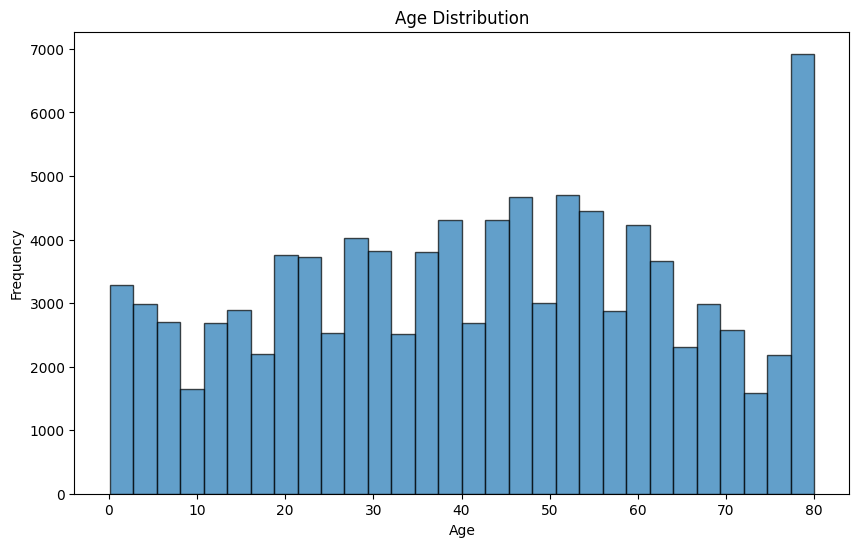

In [13]:
# Get distribution information on the 'age' group
age_distribution = df['age'].describe()
print(age_distribution)

# Plot the distribution of the 'age' group
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
age_groups = [(0, 29), (30, 59), (60, 89)]

datasets = {}
for start, end in age_groups:
    group_name = f"{start}-{end}"
    datasets[group_name] = df_scaled[(df_scaled['age'] >= start) & (df_scaled['age'] <= end)]

# Display the number of records in each dataset
for group_name, dataset in datasets.items():
    print(f"Age group {group_name}: {len(dataset)} records")

Age group 0-29: 32435 records
Age group 30-59: 42510 records
Age group 60-89: 25055 records


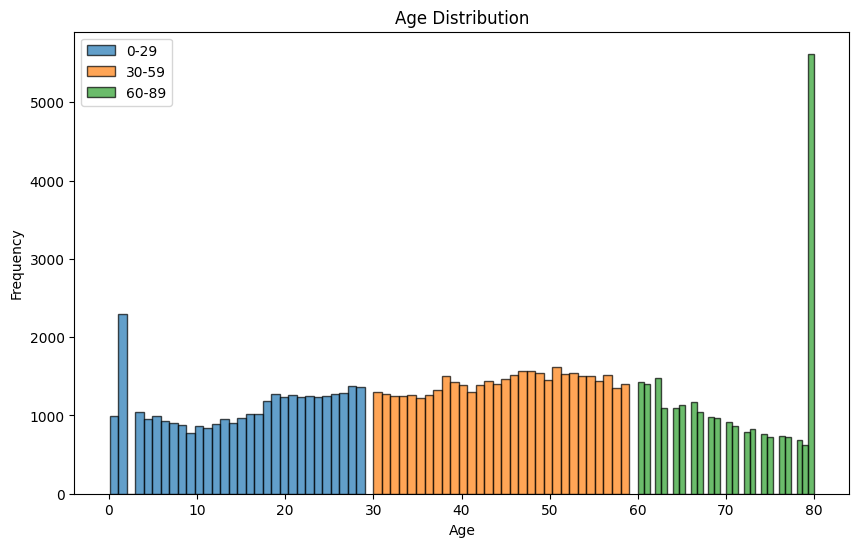

In [15]:
group1 = datasets['0-29']
group2 = datasets['30-59']
group3 = datasets['60-89']

# Plot the distribution of the 'age' group
plt.figure(figsize=(10, 6))
plt.hist(group1['age'], bins=30, edgecolor='k', alpha=0.7, label='0-29')
plt.hist(group2['age'], bins=30, edgecolor='k', alpha=0.7, label='30-59')
plt.hist(group3['age'], bins=30, edgecolor='k', alpha=0.7, label='60-89')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [26]:
# Filter the dataframe for ages between 75 and 80
age_75_80 = df[(df['age'] >= 79) & (df['age'] <= 80)]

# Count the number of records
count_75_80 = age_75_80.shape[0]
print(f"Number of people between ages 75 and 80: {count_75_80}")

Number of people between ages 75 and 80: 6242


In [20]:
# Number of entries in group3
num_entries_group3 = group3.shape[0]
print(f"Number of entries in group3: {num_entries_group3}")

Number of entries in group3: 25055


#### A possible reason why the autoencoder model for 60-89 performs badly is because of the uneven distribution of people that are 80 years old, as shown in the diagram above.